In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [79]:
# 1. LOAD & CLEAN
file_path = r"C:\Users\Hp\Downloads\Cola.xlsx"
raw_df = pd.read_excel(file_path)
raw_df

,Data provided by SimFin,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Profit & Loss statement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,in million USD,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18
3,NaN,NET OPERATING REVENUES,30990,35119,46542,48017,46854,45998,44294,41863,35410,31856
4,NaN,Cost of goods sold,11088,12693,18215,19053,18421,17889,17482,16465,13255,11770
...,...,...,...,...,...,...,...,...,...,...,...,...
98,NaN,Effect of exchange rate changes on cash and ca...,576,-166,-430,-255,-611,-934,-878,-6,241,-262
99,NaN,Cash Provided by (Used in) Investing Activitie...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-58,-421
100,NaN,Cash Provided by (Used in) Financing Activitie...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-38,205
101,NaN,Net Cash Provided by (Used in) Discontinued Op...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,15,91


In [80]:
header_idx = raw_df[raw_df.apply(lambda r: r.str.contains("FY '", na=False).any(), axis=1)].index[0]
headers = raw_df.iloc[header_idx].values
headers

array([nan, 'in million USD', "FY '09", "FY '10", "FY '11", "FY '12",
       "FY '13", "FY '14", "FY '15", "FY '16", "FY '17", "FY '18"],
      dtype=object)

In [81]:
data = raw_df.iloc[header_idx+1:].copy()
data.columns = headers
data = data.rename(columns={data.columns[1]: 'Metric'})
data = data.dropna(subset=['Metric'])
data

,NaN,Metric,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18
3,NaN,NET OPERATING REVENUES,30990,35119,46542,48017,46854,45998,44294,41863,35410,31856
4,NaN,Cost of goods sold,11088,12693,18215,19053,18421,17889,17482,16465,13255,11770
5,NaN,Gross Profit,19902,22426,28327,28964,28433,28109,26812,25398,22155,20086
6,NaN,"Selling, general and administrative expenses",11358,13194,17422,17738,17310,17218,16427,15262,12654,10307
7,NaN,Other operating charges,313,819,732,447,895,1183,1657,1510,1902,1079
...,...,...,...,...,...,...,...,...,...,...,...,...
98,NaN,Effect of exchange rate changes on cash and ca...,576,-166,-430,-255,-611,-934,-878,-6,241,-262
99,NaN,Cash Provided by (Used in) Investing Activitie...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-58,-421
100,NaN,Cash Provided by (Used in) Financing Activitie...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-38,205
101,NaN,Net Cash Provided by (Used in) Discontinued Op...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,15,91


In [82]:
def clean_finance(x):
    if pd.isna(x) or x == '' or x == '-': return 0.0
    if isinstance(x, str):
        x = x.replace(',', '').replace('$', '').strip()
        if '(' in x and ')' in x:
            x = '-' + x.replace('(', '').replace(')', '')
    try: return float(x)
    except: return 0.0

In [ ]:
# Apply the cleaning to all year columns

In [83]:
year_cols = [c for c in data.columns if "FY '" in str(c)]
for col in year_cols:
    data[col] = data[col].apply(clean_finance)

In [ ]:
# 4. TRANSPOSE FOR ANALYSIS
# We flip the data so years are the index and metrics are columns

In [84]:
df = data.set_index('Metric')[year_cols].transpose()
df.index = [int('20'+c[-2:]) for c in df.index]
df.index.name = 'Year'

In [85]:
df

Metric,NET OPERATING REVENUES,Cost of goods sold,Gross Profit,"Selling, general and administrative expenses",Other operating charges,Operating Income,Interest income,Interest expense,Equity income (loss) - net,Other income (loss) - net,Income before income taxes,Income taxes,CONSOLIDATED NET INCOME,Less: Net income attributable to noncontrolling interests,Net income from continuing operations,"Income (Loss) from Discontinued Operations, Net of Tax, Including Portion Attributable to Noncontrolling Interest",NET INCOME ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY,in million USD,Assets,Cash and cash equivalents,Short-term investments,"Total cash, cash equivalents and short-term investments",Marketable securities,"Trade accounts receivable, less allowances",Inventories,Prepaid expenses and other assets,Assets held for sale,Assets held for sale,Total current assets,Equity method investments,Other investments,Other assets,"Property, plant and equipment - net",Deferred income tax assets,TRADEMARKS WITH INDEFINITE LIVES,BOTTLERS' FRANCHISE RIGHTS WITH INDEFINITE LIVES,Goodwill,Other intangible assets,Total assets,Liabilities,Accounts payable and accrued expenses,Loans and notes payable,Current maturities of long-term debt,Accrued income taxes,Liabilities held for sale,"Liabilities Held for Sale, Discontinued Operations",Total current liabilities,Long-term debt,Other liabilities,Deferred income taxes,Common stock,Capital surplus,Reinvested earnings,Accumulated other comprehensive income (loss),"Treasury stock, at cost",EQUITY ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,in million USD,CONSOLIDATED NET INCOME,Depreciation and amortization,(Income) Loss from discontinued operations,Net income from continuing operations,Stock-based compensation expense,Deferred income taxes,Equity (income) loss - net of dividends,Foreign currency adjustments,Significant (gains) losses on sales of assets - net,Other significant (gains) losses - net,Other operating charges,Other items,Net change in operating assets and liabilities,Net cash provided by operating activities,Purchases of short-term investments,Purchases of investments,Proceeds from disposals of investments,"Acquisitions of businesses, equity method investments and nonmarketable securities","Proceeds from disposals of businesses, equity method investments and nonmarkatable securities","Purchases of property, plant and equipment","Proceeds from disposals of property, plant and equipment",Other investing activities,Net cash provided by (used in) investing activities,Issuances of debt,Payments of debt,Issuances of stock,Purchases of stock for treasury,Dividends,Other financing activities,Net cash provided by (used in) financing activities,"Cash Provided by (Used in) Operating Activities, Discontinued Operations",Effect of exchange rate changes on cash and cash equivalents,"Cash Provided by (Used in) Investing Activities, Discontinued Operations","Cash Provided by (Used in) Financing Activities, Discontinued Operations",Net Cash Provided by (Used in) Discontinued Operations,Net increase (decrease) during the year
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,30990.0,11088.0,19902.0,11358.0,313.0,8231.0,249.0,355.0,781.0,40.0,8946.0,2040.0,6906.0,82.0,0.0,0.0,6824.0,0.0,0.0,7021.0,2130.0,9151.0,62.0,3758.0,2354.0,2226.0,0.0,0.0,17551.0,6217.0,538.0,1976.0,9561.0,0.0,6183.0,1953.0,4224.0,468.0,48671.0,0.0,6657.0,6749.0,51.0,264.0,0.0,0.0,13721.0,5059.0,2965.0,1580.0,880.0,8537.0,41537.0,-757.0,-25398.0,24799.0,547.0,25346.0,48671.0,0.0,6906.0,1236.0,0.0,0.0,241.0,353.0,-359.0,61.0,-43.0,0.0,134.0,221.0,-564.0,8186.0,-2130.0,-22.0,0.0,-300.0,240.0,-1993.0,104.0,-48.0,-4149.0,14689.0,-12326.0,664.0,-1518.0,-3800.0,-2.0,-2293.0,0.0,576.0,0.0,0.0,0.0,2320.0
2010,35119.0,12693.0,22426.0,13194.0,819.0,8413.0,317.0,733.0,1025.0,5185.0,14207.0,2

In [ ]:
# 5. DATA ANALYSIS CALCULATIONS
# We calculate Profitability Margins and Year-over-Year Growth

In [86]:
revenue_key = 'NET OPERATING REVENUES'
gp_key = 'Gross Profit'
ni_key = 'NET INCOME ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY'

In [87]:
df['Gross_Margin_%'] = (df[gp_key] / df[revenue_key]) * 100
df

Metric,NET OPERATING REVENUES,Cost of goods sold,Gross Profit,"Selling, general and administrative expenses",Other operating charges,Operating Income,Interest income,Interest expense,Equity income (loss) - net,Other income (loss) - net,Income before income taxes,Income taxes,CONSOLIDATED NET INCOME,Less: Net income attributable to noncontrolling interests,Net income from continuing operations,"Income (Loss) from Discontinued Operations, Net of Tax, Including Portion Attributable to Noncontrolling Interest",NET INCOME ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY,in million USD,Assets,Cash and cash equivalents,Short-term investments,"Total cash, cash equivalents and short-term investments",Marketable securities,"Trade accounts receivable, less allowances",Inventories,Prepaid expenses and other assets,Assets held for sale,Assets held for sale,Total current assets,Equity method investments,Other investments,Other assets,"Property, plant and equipment - net",Deferred income tax assets,TRADEMARKS WITH INDEFINITE LIVES,BOTTLERS' FRANCHISE RIGHTS WITH INDEFINITE LIVES,Goodwill,Other intangible assets,Total assets,Liabilities,Accounts payable and accrued expenses,Loans and notes payable,Current maturities of long-term debt,Accrued income taxes,Liabilities held for sale,"Liabilities Held for Sale, Discontinued Operations",Total current liabilities,Long-term debt,Other liabilities,Deferred income taxes,Common stock,Capital surplus,Reinvested earnings,Accumulated other comprehensive income (loss),"Treasury stock, at cost",EQUITY ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,in million USD,CONSOLIDATED NET INCOME,Depreciation and amortization,(Income) Loss from discontinued operations,Net income from continuing operations,Stock-based compensation expense,Deferred income taxes,Equity (income) loss - net of dividends,Foreign currency adjustments,Significant (gains) losses on sales of assets - net,Other significant (gains) losses - net,Other operating charges,Other items,Net change in operating assets and liabilities,Net cash provided by operating activities,Purchases of short-term investments,Purchases of investments,Proceeds from disposals of investments,"Acquisitions of businesses, equity method investments and nonmarketable securities","Proceeds from disposals of businesses, equity method investments and nonmarkatable securities","Purchases of property, plant and equipment","Proceeds from disposals of property, plant and equipment",Other investing activities,Net cash provided by (used in) investing activities,Issuances of debt,Payments of debt,Issuances of stock,Purchases of stock for treasury,Dividends,Other financing activities,Net cash provided by (used in) financing activities,"Cash Provided by (Used in) Operating Activities, Discontinued Operations",Effect of exchange rate changes on cash and cash equivalents,"Cash Provided by (Used in) Investing Activities, Discontinued Operations","Cash Provided by (Used in) Financing Activities, Discontinued Operations",Net Cash Provided by (Used in) Discontinued Operations,Net increase (decrease) during the year,Gross_Margin_%
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,30990.0,11088.0,19902.0,11358.0,313.0,8231.0,249.0,355.0,781.0,40.0,8946.0,2040.0,6906.0,82.0,0.0,0.0,6824.0,0.0,0.0,7021.0,2130.0,9151.0,62.0,3758.0,2354.0,2226.0,0.0,0.0,17551.0,6217.0,538.0,1976.0,9561.0,0.0,6183.0,1953.0,4224.0,468.0,48671.0,0.0,6657.0,6749.0,51.0,264.0,0.0,0.0,13721.0,5059.0,2965.0,1580.0,880.0,8537.0,41537.0,-757.0,-25398.0,24799.0,547.0,25346.0,48671.0,0.0,6906.0,1236.0,0.0,0.0,241.0,353.0,-359.0,61.0,-43.0,0.0,134.0,221.0,-564.0,8186.0,-2130.0,-22.0,0.0,-300.0,240.0,-1993.0,104.0,-48.0,-4149.0,14689.0,-12326.0,664.0,-1518.0,-3800.0,-2.0,-2293.0,0.0,576.0,0.0,0.0,0.0,2320.0,64.220716
2010,35119.0,12693.0,22426.0,13194.0,819.0,8413.0,317.0,733

In [126]:
df['Net_Profit_Margin_%'] = (df[ni_key] / df[revenue_key]) * 100
df['Revenue_Growth_%'] = df[revenue_key].pct_change() * 100
df['YoY_Growth_%'] = df[revenue_key].pct_change() * 100
df

Metric,NET OPERATING REVENUES,Cost of goods sold,Gross Profit,"Selling, general and administrative expenses",Other operating charges,Operating Income,Interest income,Interest expense,Equity income (loss) - net,Other income (loss) - net,Income before income taxes,Income taxes,CONSOLIDATED NET INCOME,Less: Net income attributable to noncontrolling interests,Net income from continuing operations,"Income (Loss) from Discontinued Operations, Net of Tax, Including Portion Attributable to Noncontrolling Interest",NET INCOME ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY,in million USD,Assets,Cash and cash equivalents,Short-term investments,"Total cash, cash equivalents and short-term investments",Marketable securities,"Trade accounts receivable, less allowances",Inventories,Prepaid expenses and other assets,Assets held for sale,Assets held for sale,Total current assets,Equity method investments,Other investments,Other assets,"Property, plant and equipment - net",Deferred income tax assets,TRADEMARKS WITH INDEFINITE LIVES,BOTTLERS' FRANCHISE RIGHTS WITH INDEFINITE LIVES,Goodwill,Other intangible assets,Total assets,Liabilities,Accounts payable and accrued expenses,Loans and notes payable,Current maturities of long-term debt,Accrued income taxes,Liabilities held for sale,"Liabilities Held for Sale, Discontinued Operations",Total current liabilities,Long-term debt,Other liabilities,Deferred income taxes,Common stock,Capital surplus,Reinvested earnings,Accumulated other comprehensive income (loss),"Treasury stock, at cost",EQUITY ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,in million USD,CONSOLIDATED NET INCOME,Depreciation and amortization,(Income) Loss from discontinued operations,Net income from continuing operations,Stock-based compensation expense,Deferred income taxes,Equity (income) loss - net of dividends,Foreign currency adjustments,Significant (gains) losses on sales of assets - net,Other significant (gains) losses - net,Other operating charges,Other items,Net change in operating assets and liabilities,Net cash provided by operating activities,Purchases of short-term investments,Purchases of investments,Proceeds from disposals of investments,"Acquisitions of businesses, equity method investments and nonmarketable securities","Proceeds from disposals of businesses, equity method investments and nonmarkatable securities","Purchases of property, plant and equipment","Proceeds from disposals of property, plant and equipment",Other investing activities,Net cash provided by (used in) investing activities,Issuances of debt,Payments of debt,Issuances of stock,Purchases of stock for treasury,Dividends,Other financing activities,Net cash provided by (used in) financing activities,"Cash Provided by (Used in) Operating Activities, Discontinued Operations",Effect of exchange rate changes on cash and cash equivalents,"Cash Provided by (Used in) Investing Activities, Discontinued Operations","Cash Provided by (Used in) Financing Activities, Discontinued Operations",Net Cash Provided by (Used in) Discontinued Operations,Net increase (decrease) during the year,Gross_Margin_%,Net_Profit_Margin_%,Revenue_Growth_%,YoY_Growth_%
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,30990.0,11088.0,19902.0,11358.0,313.0,8231.0,249.0,355.0,781.0,40.0,8946.0,2040.0,6906.0,82.0,0.0,0.0,6824.0,0.0,0.0,7021.0,2130.0,9151.0,62.0,3758.0,2354.0,2226.0,0.0,0.0,17551.0,6217.0,538.0,1976.0,9561.0,0.0,6183.0,1953.0,4224.0,468.0,48671.0,0.0,6657.0,6749.0,51.0,264.0,0.0,0.0,13721.0,5059.0,2965.0,1580.0,880.0,8537.0,41537.0,-757.0,-25398.0,24799.0,547.0,25346.0,48671.0,0.0,6906.0,1236.0,0.0,0.0,241.0,353.0,-359.0,61.0,-43.0,0.0,134.0,221.0,-564.0,8186.0,-2130.0,-22.0,0.0,-300.0,240.0,-1993.0,104.0,-48.0,-4149.0,14689.0,-12326.0,664.0,-1518.0,-3800.0,-2.0,-2293.0,0.0,576.0,0.0,0.0,0.0,2320.0,64.220716,22.020

In [ ]:
# 6. VISUALIZATION

In [127]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

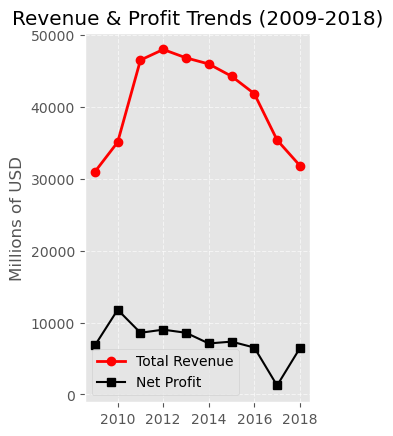

In [128]:
# Subplot 1: Revenue vs Net Income
plt.subplot(1, 2, 1)
plt.plot(df.index, df[revenue_key], marker='o', color='red', linewidth=2, label='Total Revenue')
plt.plot(df.index, df[ni_key], marker='s', color='black', label='Net Profit')
plt.title('Revenue & Profit Trends (2009-2018)')
plt.ylabel('Millions of USD')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

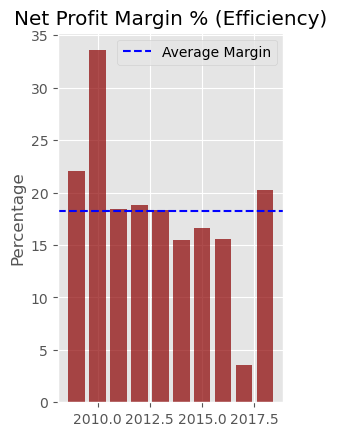

In [91]:
# Subplot 2: Profitability Efficiency
plt.subplot(1, 2, 2)
plt.bar(df.index, df['Net_Profit_Margin_%'], color='darkred', alpha=0.7)
plt.axhline(df['Net_Profit_Margin_%'].mean(), color='blue', linestyle='--', label='Average Margin')
plt.title('Net Profit Margin % (Efficiency)')
plt.ylabel('Percentage')
plt.legend()

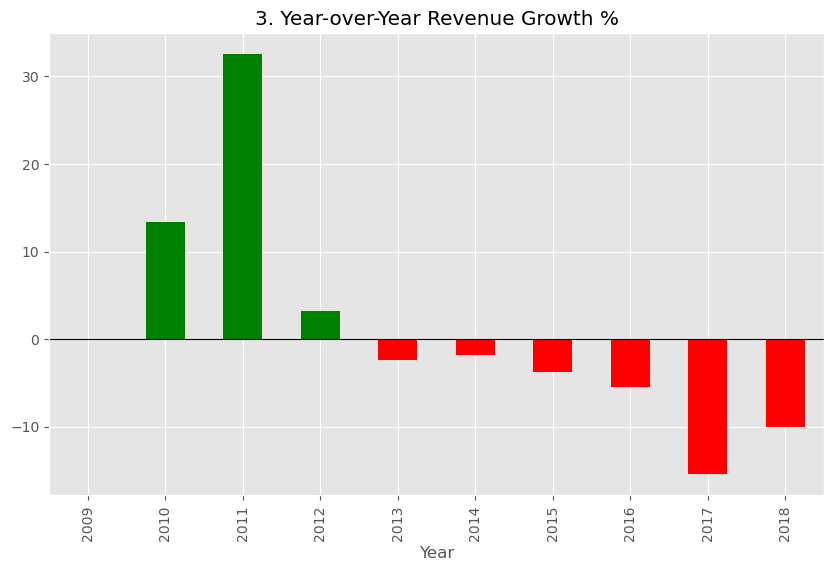

In [135]:
# V3: YoY Growth Bar Chart
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in df['YoY_Growth_%'].fillna(0)]
df['YoY_Growth_%'].plot(kind='bar', color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('3. Year-over-Year Revenue Growth %')
plt.savefig('bar_yoy_growth.png')

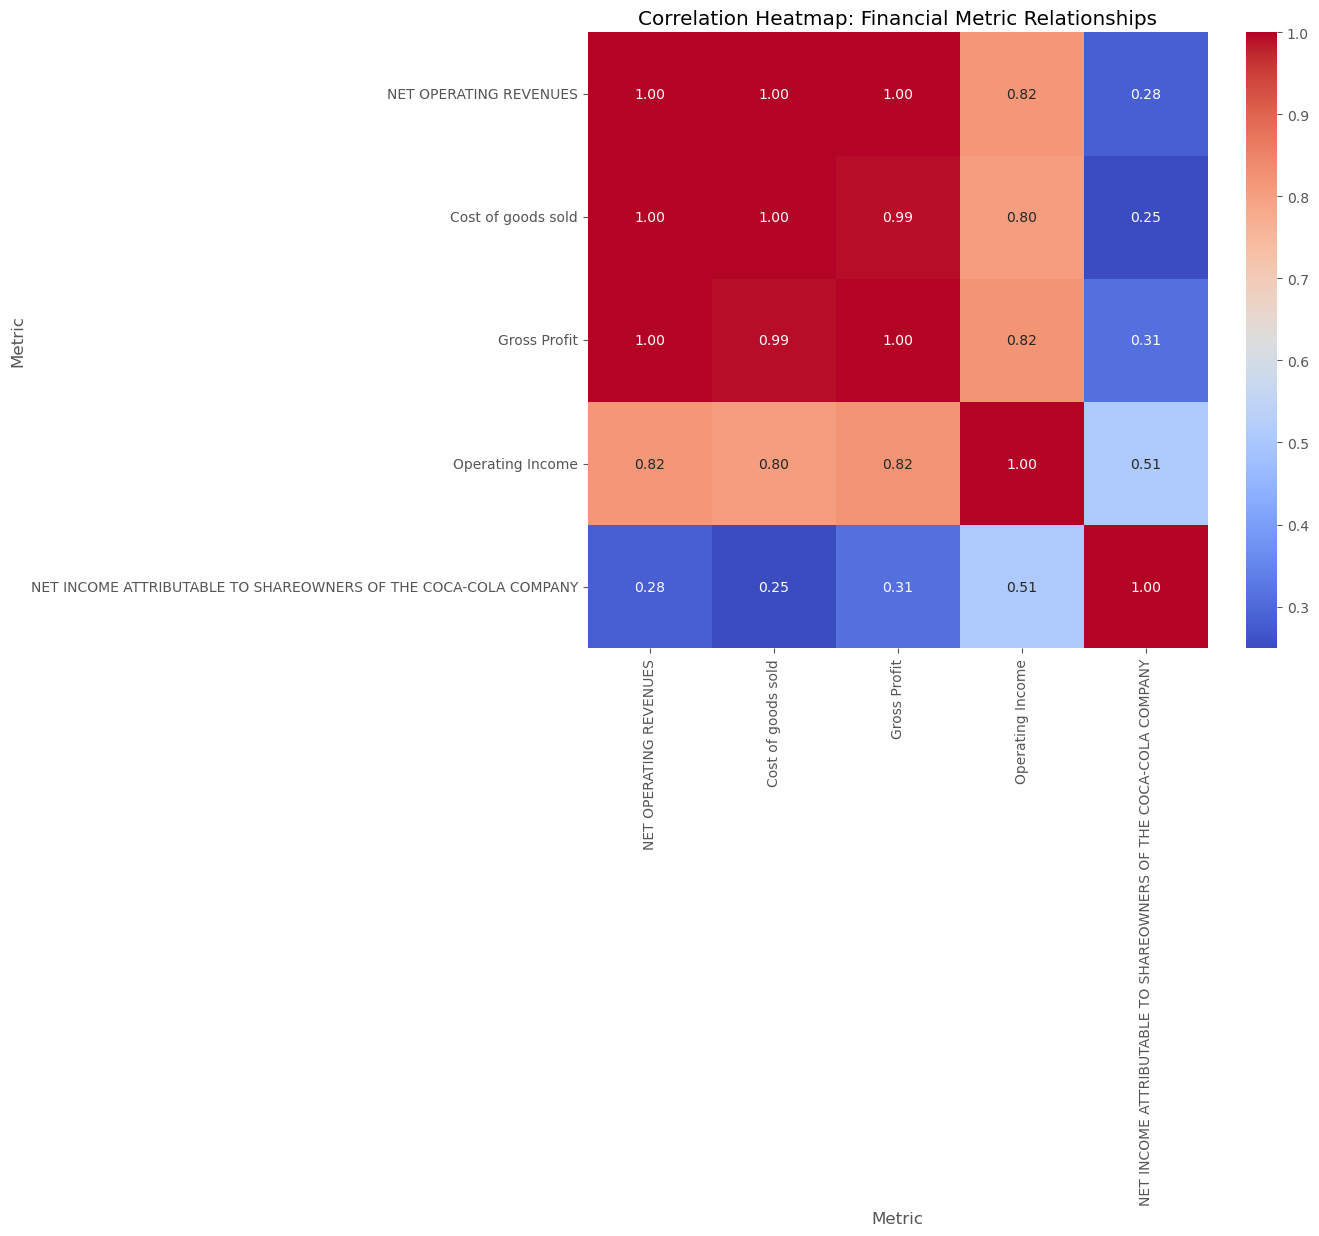

In [129]:
# 3a. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_metrics = [revenue_key, 'Cost of goods sold', gp_key, 'Operating Income', ni_key]
sns.heatmap(df[corr_metrics].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Financial Metric Relationships')
plt.savefig('unified_correlation_heatmap.png')

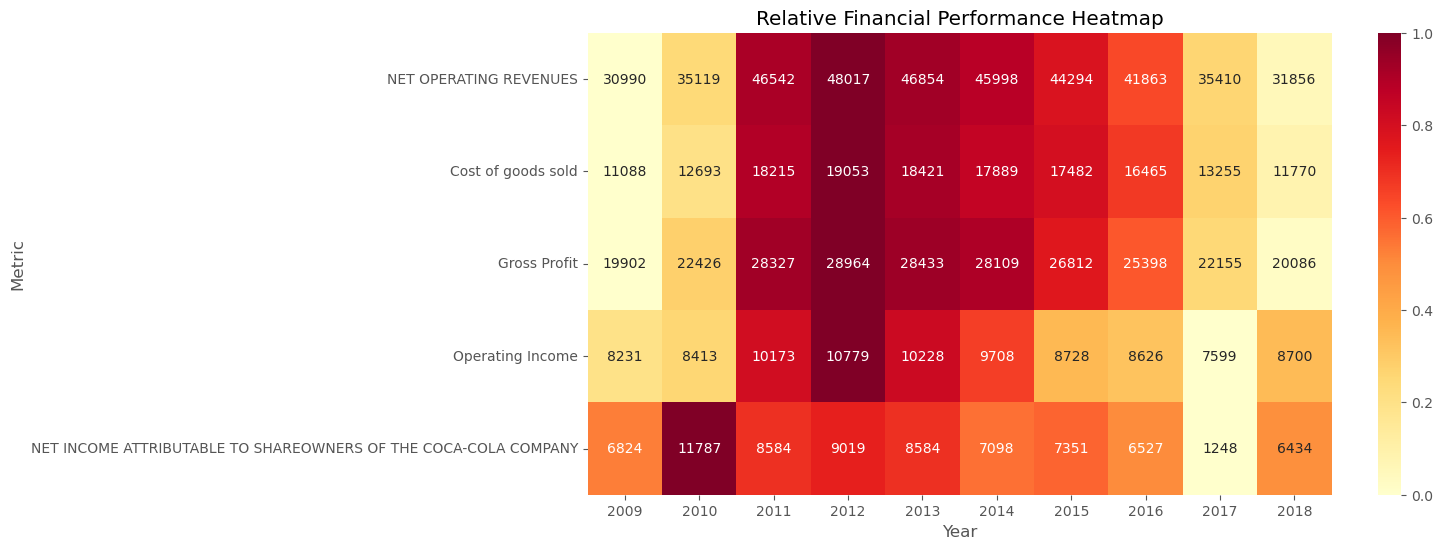

In [130]:
# 3b. Performance Heatmap (Normalized)
df_norm = (df[corr_metrics] - df[corr_metrics].min()) / (df[corr_metrics].max() - df[corr_metrics].min())
plt.figure(figsize=(12, 6))
sns.heatmap(df_norm.transpose(), cmap='YlOrRd', annot=df[corr_metrics].transpose(), fmt='.0f')
plt.title('Relative Financial Performance Heatmap')
plt.savefig('unified_performance_heatmap.png')

In [131]:
plt.tight_layout()
plt.savefig('coca_cola_final_analysis.png')

<Figure size 640x480 with 0 Axes>

In [132]:
# Output the result
print("--- Final Cleaned Analysis ---")
print(df[[revenue_key, ni_key, 'Net_Profit_Margin_%']].tail())

--- Final Cleaned Analysis ---
Metric  NET OPERATING REVENUES  \
Year                             
2014                   45998.0   
2015                   44294.0   
2016                   41863.0   
2017                   35410.0   
2018                   31856.0   

Metric  NET INCOME ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY  \
Year                                                                      
2014                                               7098.0                 
2015                                               7351.0                 
2016                                               6527.0                 
2017                                               1248.0                 
2018                                               6434.0                 

Metric  Net_Profit_Margin_%  
Year                         
2014              15.431106  
2015              16.595927  
2016              15.591334  
2017               3.524428  
2018              20.197

In [ ]:
#MACHINE LEARNING & OUTLIER REMOVAL

In [133]:
# Identifying 2017 as the Outlier (Tax event)
df_no_outlier = df.drop(index=2017)

In [134]:
future_years = np.array(range(2019, 2029)).reshape(-1, 1)
X_train_rev = np.array(df.index).reshape(-1, 1)
X_train_ni = np.array(df_no_outlier.index).reshape(-1, 1)
X_train_ni

array([[2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2018]])

In [104]:
# Fit Models
model_rev = LinearRegression().fit(X_train_rev, df[revenue_key])
model_ni = LinearRegression().fit(X_train_ni, df_no_outlier[ni_key])
model_rev

LinearRegression()

In [107]:
# Predict
rev_preds = model_rev.predict(future_years)
ni_preds = model_ni.predict(future_years)
rev_preds,ni_preds

(array([39841.33333333, 39686.24848485, 39531.16363636, 39376.07878788,
        39220.99393939, 39065.90909091, 38910.82424242, 38755.73939394,
        38600.65454545, 38445.56969697]),
 array([6029.95967742, 5691.5       , 5353.04032258, 5014.58064516,
        4676.12096774, 4337.66129032, 3999.2016129 , 3660.74193548,
        3322.28225806, 2983.82258065]))

In [ ]:
# FINAL PLOTTING & EXPORT

In [119]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

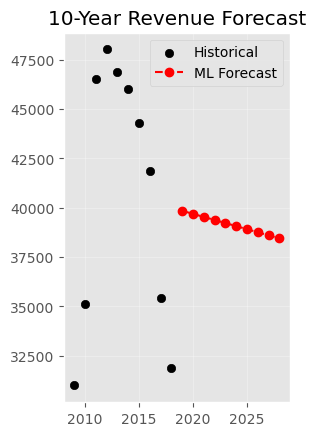

In [120]:
# Revenue Forecast Plot
plt.subplot(1, 2, 1)
plt.scatter(df.index, df[revenue_key], color='black', label='Historical')
plt.plot(future_years, rev_preds, color='red', linestyle='--', marker='o', label='ML Forecast')
plt.title('10-Year Revenue Forecast')
plt.grid(True, alpha=0.3)
plt.legend()

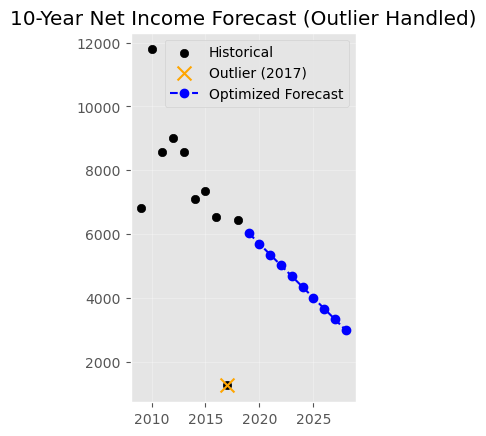

In [121]:
# Net Income Forecast Plot
plt.subplot(1, 2, 2)
plt.scatter(df.index, df[ni_key], color='black', label='Historical')
plt.scatter([2017], [df.loc[2017, ni_key]], color='orange', marker='x', s=100, label='Outlier (2017)')
plt.plot(future_years, ni_preds, color='blue', linestyle='--', marker='o', label='Optimized Forecast')
plt.title('10-Year Net Income Forecast (Outlier Handled)')
plt.grid(True, alpha=0.3)
plt.legend()

In [123]:
# Save all results to one CSV
forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Revenue': rev_preds,
    'Net Income': ni_preds,
    'Data_Type': 'Forecast'
})
historical_df = df[[revenue_key, ni_key]].reset_index()
historical_df.columns = ['Year', 'Revenue', 'Net Income']
historical_df['Data_Type'] = 'Historical'

final_combined_output = pd.concat([historical_df, forecast_df], ignore_index=True)
final_combined_output.to_csv('coca_cola_full_analysis_report.csv', index=False)

print("Full process completed successfully. Files generated.")

Full process completed successfully. Files generated.
